# Read the Data and Pick 10 Features for Research

### Our main goal: Among the selected features, identify which features are related with diabetes, and how they are correlated.

### Features we picked:

#### 1. Age (AGE_P)

Type: Continuous variable

Description: Represents the respondent's age in years.

Example values: 18, 35, 60, etc.

Why: Diabetes risk increases with age, especially for Type 2 diabetes.


#### 2. Sex (SEX)

Type: Categorical variable

Possible values:

1: Male

2: Female

7: Refused

9: Don't know

Why: There may be gender differences in diabetes prevalence and risk factors.


#### 3. Body Mass Index (BMI)

Type: Continuous variable

Description: The body mass index (BMI) is calculated from height and weight.

Example values:

<18.5: Underweight

18.5–24.9: Normal weight

25–29.9: Overweight

30 or greater: Obesity

Why: Obesity is one of the strongest risk factors for Type 2 diabetes.


#### 4. Hypertension (HYPEV)

Type: Categorical variable

Possible values:

1: Yes

2: No

7: Refused

9: Don’t know

Why: High blood pressure is often associated with diabetes.


#### 5. Cholesterol Levels (CHLEV)

Type: Categorical variable

Possible values:

1: Yes

2: No

7: Refused

9: Don’t know

Why: High cholesterol is a common comorbidity with diabetes and can lead to related complications.




#### 6. Smoking Status SMKNOW (Current Smoking Status)


Type: Categorical variable

Possible values:

1: Every day

2: Some days

3: Not at all

7: Refused

9: Don’t know

Why: Smoking has been linked to an increased risk of diabetes and other chronic conditions.


#### 7. Family History of Diabetes (DIBREL)

Type: Categorical variable

Possible values:

1: Yes

2: No

7: Refused

9: Don’t know

Why: A family history of diabetes significantly increases an individual's risk.


#### 8. Gestational Diabetes (DIBGDM)

Type: Categorical variable

Possible values:

1: Yes

2: No

7: Refused

9: Don’t know

Why: Women who develop gestational diabetes during pregnancy have a higher risk of developing Type 2 diabetes later in life.


#### 9. Alcohol Consumption (ALC1YR)

Type: Categorical variable

Possible values:

1: Yes (consumed alcohol in the past year)

2: No (did not consume alcohol in the past year)

7: Refused (refused to answer the question)

9: Don't know (unsure if consumed alcohol in the past year)

Why: Excessive alcohol consumption can increase the risk of diabetes through its impact on weight and liver function.


### Tag for Diabetes (DIBEV1)

Type: Categorical variable

Possible values:

1: Yes (the respondent has been diagnosed with diabetes)

2: No (the respondent has not been diagnosed with diabetes)

3: Borderline (the respondent has been told they have borderline diabetes)

7: Refused (the respondent refused to answer)

9: Don't know (the respondent is unsure if they have been diagnosed with diabetes)

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("samadult.csv")
df.head()

,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,...,BFWH_05,BFWH_06,BFWH_07,BFWH_08,BFWH_09,BFWH_10,BNRFALL,BINTHI,BINTTR,BINTRS
0,1,1,1,1,11241.0,26100,1,12,8,2,...,2.0,2.0,2.0,2.0,1.0,2.0,5.0,2.0,2.0,2.0
1,1,2,1,1,5620.5,11294,2,12,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2,1,2919.3,2506,1,12,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1,3,1,8883.8,9267,2,3,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,5,1,3300.8,3443,2,3,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df["BMI"] = df['AWEIGHTP'] / (df['AHEIGHT'] * df['AHEIGHT']) * 703

In [11]:
# List of columns to keep (10 key features + diabetes indicator column)
columns_to_keep = [
    'AGE_P',     # Age
    'SEX',       # Sex
    'BMI',       # Body Mass Index
    'HYPEV',     # Hypertension diagnosis
    'CHLEV',     # Cholesterol diagnosis
    'SMKNOW',    # Current smoking status
    'ALC1YR',    # Alcohol Consumption
    'DIBREL',    # Family history of diabetes
    'DIBGDM',    # Gestational diabetes history
    'DIBEV1'     # Diabetes diagnosis (Yes/No/Borderline)
]

In [12]:
# Create a new DataFrame with only the selected columns
samadult = df[columns_to_keep]
samadult.head()

,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22,1,33.378378,2,2,NaN,1,1,NaN,2
1,24,2,20.173324,2,2,NaN,1,2,NaN,2
2,76,1,27.259184,1,1,NaN,2,2,NaN,2
3,36,2,38.616943,2,2,NaN,1,1,2.0,2
4,35,2,39.933728,2,2,1.0,1,1,2.0,2


# Preprocessing the Dataset

## Reduce Outliers

In [13]:
#Suspect outlier in BMI column (such as BMI = 99.99)
#Convert the BMI into category to reduce the impact

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'

samadult['BMI'] = samadult['BMI'].apply(categorize_bmi)
samadult

/var/folders/nl/hvb2wh_x56xfglf7ds9c47tc0000gn/T/ipykernel_36392/3042757942.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samadult['BMI'] = samadult['BMI'].apply(categorize_bmi)


,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22,1,Obesity,2,2,NaN,1,1,NaN,2
1,24,2,Normal weight,2,2,NaN,1,2,NaN,2
2,76,1,Overweight,1,1,NaN,2,2,NaN,2
3,36,2,Obesity,2,2,NaN,1,1,2.0,2
4,35,2,Obesity,2,2,1.0,1,1,2.0,2
...,...,...,...,...,...,...,...,...,...,...
33023,56,1,Normal weight,2,2,3.0,1,1,NaN,2
33024,58,1,Obesity,1,1,3.0,1,1,NaN,2
33025,71,2,Overweight,1,1,3.0,2,1,2.0,1
33026,64,1,Overweight,1,1,3.0,2,2,NaN,2


### Can converting BMI number into categories reduce the impact of outliers?

Yes. Here are reasons:

### Outlier Mitigation:

When converting to categories, you're mapping a potentially extreme or erroneous value (like 99.99, which is unreasonably high for BMI) into a broad category (e.g., "Obesity"). This reduces the influence that extreme values could have in the dataset, as you no longer work with exact values but with predefined ranges.

### Loss of Extremes:

For example, if you have a BMI value of 99.99, after conversion, it would fall into the "Obesity" category. This conversion disregards how extreme the value is, treating it the same as any other BMI over 30, thereby reducing its impact.

### Interpretability:

Categories are easier to interpret in studies where you're interested in general patterns (e.g., whether obesity correlates with diabetes). By categorizing BMI, you're focusing on broader trends rather than specific extreme values.

# Preprocessing the dataset

## Handle Missing Values

In [14]:
import numpy as np

In [15]:
#Besides the NaN in the dataset, we also have people who answer 9, which is don't know
#Convert option 9 as NaN for categorical data

# List of columns where the special missing values occur
categorical_columns = ['SEX', 'HYPEV', 'CHLEV', 'SMKNOW', 'DIBREL', 'DIBGDM', 'ALC1YR']

samadult[categorical_columns] = samadult[categorical_columns].replace([9], np.nan)
samadult.head(10)

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22,1.0,Obesity,2.0,2.0,NaN,1.0,1.0,NaN,2
1,24,2.0,Normal weight,2.0,2.0,NaN,1.0,2.0,NaN,2
2,76,1.0,Overweight,1.0,1.0,NaN,2.0,2.0,NaN,2
3,36,2.0,Obesity,2.0,2.0,NaN,1.0,1.0,2.0,2
4,35,2.0,Obesity,2.0,2.0,1.0,1.0,1.0,2.0,2
5,20,2.0,Normal weight,2.0,2.0,NaN,2.0,1.0,NaN,2
6,19,2.0,Normal weight,2.0,2.0,NaN,2.0,NaN,NaN,2
7,45,2.0,Overweight,2.0,1.0,1.0,1.0,1.0,NaN,2
8,18,2.0,Normal weight,2.0,2.0,NaN,1.0,2.0,NaN,2
9,20,2.0,Normal weight,2.0,2.0,NaN,2.0,2.0,NaN,2


In [16]:
#Then let's check how many people refuse to answer (choose 7)
for col in categorical_columns:
    count_refused = samadult[col].value_counts().get(7, 0)  # Get the count of 7 (or 0 if not present)
    print(f"Column {col} has {count_refused} instances of value 7.")

Column SEX has 0 instances of value 7.
Column HYPEV has 21 instances of value 7.
Column CHLEV has 24 instances of value 7.
Column SMKNOW has 3 instances of value 7.
Column DIBREL has 27 instances of value 7.
Column DIBGDM has 5 instances of value 7.
Column ALC1YR has 47 instances of value 7.


In [17]:
#Since we have more than 33028 observations, and the number of observations is very small
#We can change them to the mode
import pandas as pd

# Assuming df is your DataFrame

# Loop through each column and replace "7" with the mode
for col in samadult.columns:
    mode_value = samadult[col].mode()[0]  # Get the most frequent value (mode)
    # Replace "7" with the mode, ensuring the mode itself is not 7
    if mode_value != 7:
        samadult[col].replace(7, mode_value, inplace=True)

samadult.head()

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22,1.0,Obesity,2.0,2.0,NaN,1.0,1.0,NaN,2
1,24,2.0,Normal weight,2.0,2.0,NaN,1.0,2.0,NaN,2
2,76,1.0,Overweight,1.0,1.0,NaN,2.0,2.0,NaN,2
3,36,2.0,Obesity,2.0,2.0,NaN,1.0,1.0,2.0,2
4,35,2.0,Obesity,2.0,2.0,1.0,1.0,1.0,2.0,2


In [18]:
#Then let's check if all of them are converted
for col in categorical_columns:
    count_refused = samadult[col].value_counts().get(7, 0)  # Get the count of 7 (or 0 if not present)
    print(f"Column {col} has {count_refused} instances of value 7.")

Column SEX has 0 instances of value 7.
Column HYPEV has 0 instances of value 7.
Column CHLEV has 0 instances of value 7.
Column SMKNOW has 0 instances of value 7.
Column DIBREL has 0 instances of value 7.
Column DIBGDM has 0 instances of value 7.
Column ALC1YR has 0 instances of value 7.


In [19]:
#Finally, let's deal with the missing value

#First, check the percentage of missing
print(samadult.isnull().mean() * 100)

AGE_P      0.000000
SEX        0.000000
BMI        0.000000
HYPEV      0.084777
CHLEV      0.196803
SMKNOW    59.125590
ALC1YR     0.060555
DIBREL     1.341286
DIBGDM    58.771346
DIBEV1     0.000000
dtype: float64


Before we try to deal with Nan values, we remove all rows that does not have a valid value for our target DIBEV1

In [20]:
samadult = samadult[samadult["DIBEV1"].isin({1, 2})]

We also changed the target label: no diabetes from 2 to 0 for readability

In [21]:
samadult.loc[samadult["DIBEV1"] == 2, "DIBEV1"] = 0

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Since Age contains only two values, we change the value 2 to 0, so that, 0 = female and 1 = male

In [22]:
samadult.loc[samadult["SEX"]==2, "SEX"] = 0

In [23]:
samadult.loc[samadult["HYPEV"] == 2, "HYPEV"] = 0

In [24]:
samadult.loc[samadult["CHLEV"] == 2, "CHLEV"] = 0

In [25]:
samadult.loc[samadult["DIBREL"] == 2, "DIBREL"] = 0

In [26]:
weird_col = ['SMKNOW', 'ALC1YR']
samadult[weird_col] = samadult[weird_col].replace([8], np.nan)

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [27]:
samadult.loc[samadult['DIBGDM']==2, 'DIBGDM'] = 0
samadult.loc[(samadult['SEX']==1) & (samadult['DIBGDM']==1), 'DIBGDM'] = 0

 For columns like SMKNOW and DIBGDM, the missingness is high (59% and 58% respectively).
 
 We can use KNN imputation to fill in missing values based on similar observations.

In [28]:
#To apply KNN, let's conduct Label Encoding
from sklearn.preprocessing import LabelEncoder

# Example: Convert BMI category to numerical values using LabelEncoder
label_encoder = LabelEncoder()
samadult['BMI'] = label_encoder.fit_transform(samadult['BMI'])  # Assuming BMI is categorical
samadult

/var/folders/nl/hvb2wh_x56xfglf7ds9c47tc0000gn/T/ipykernel_36392/3796848072.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samadult['BMI'] = label_encoder.fit_transform(samadult['BMI'])  # Assuming BMI is categorical


,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22,1.0,1,0.0,0.0,NaN,1.0,1.0,NaN,0
1,24,0.0,0,0.0,0.0,NaN,1.0,0.0,NaN,0
2,76,1.0,2,1.0,1.0,NaN,2.0,0.0,NaN,0
3,36,0.0,1,0.0,0.0,NaN,1.0,1.0,0.0,0
4,35,0.0,1,0.0,0.0,1.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
33023,56,1.0,0,0.0,0.0,3.0,1.0,1.0,NaN,0
33024,58,1.0,1,1.0,1.0,3.0,1.0,1.0,NaN,0
33025,71,0.0,2,1.0,1.0,3.0,2.0,1.0,0.0,1
33026,64,1.0,2,1.0,1.0,3.0,2.0,0.0,NaN,0


## Nan strategy -- KNN Imputer

In [34]:
samadult

,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22,1.0,1,0.0,0.0,NaN,1.0,1.0,NaN,0
1,24,0.0,0,0.0,0.0,NaN,1.0,0.0,NaN,0
2,76,1.0,2,1.0,1.0,NaN,2.0,0.0,NaN,0
3,36,0.0,1,0.0,0.0,NaN,1.0,1.0,0.0,0
4,35,0.0,1,0.0,0.0,1.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
33023,56,1.0,0,0.0,0.0,3.0,1.0,1.0,NaN,0
33024,58,1.0,1,1.0,1.0,3.0,1.0,1.0,NaN,0
33025,71,0.0,2,1.0,1.0,3.0,2.0,1.0,0.0,1
33026,64,1.0,2,1.0,1.0,3.0,2.0,0.0,NaN,0


In [35]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Use KNNImputer for missing value imputation
imputer = KNNImputer(n_neighbors=5)
# target = samadult[["DIBEV1"]]
# samadult_imputed = pd.DataFrame(imputer.fit_transform(samadult.iloc[:, :-1]), columns=samadult.columns[:-1])
samadult_imputed = pd.DataFrame(imputer.fit_transform(samadult), columns=samadult.columns)

In [36]:
samadult_imputed

,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22.0,1.0,1.0,0.0,0.0,1.6,1.0,1.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,1.4,1.0,0.0,0.0,0.0
2,76.0,1.0,2.0,1.0,1.0,2.2,2.0,0.0,0.0,0.0
3,36.0,0.0,1.0,0.0,0.0,2.4,1.0,1.0,0.0,0.0
4,35.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
32118,56.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0
32119,58.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.2,0.0
32120,71.0,0.0,2.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0
32121,64.0,1.0,2.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0


### Preprocessing for samadult_imputed

Since we choose to fill value 9 (Don't know) with Nan and 7 (Refused) with the mode, we then fill all Nan values with KNNImputer. we can see every categorical variable that has Nan values will be filled with a float value in between the minimum and maximum original value.

In [37]:
for c in samadult_imputed.columns:
    print(samadult_imputed[c].value_counts())

85.0    1109
68.0     610
63.0     600
59.0     595
60.0     591
        ... 
80.0     245
81.0     227
82.0     206
83.0     186
84.0     176
Name: AGE_P, Length: 68, dtype: int64
0.0    17552
1.0    14571
Name: SEX, dtype: int64
1.0    11140
2.0    10584
0.0    10006
3.0      393
Name: BMI, dtype: int64
0.0    20993
1.0    11115
0.4        5
0.2        4
0.6        4
0.8        2
Name: HYPEV, dtype: int64
0.0    22593
1.0     9486
0.6       17
0.4       11
0.2        9
0.8        7
Name: CHLEV, dtype: int64
3.0    10180
1.0     4191
2.2     3548
2.6     3159
2.0     3047
1.8     2748
2.4     1646
1.6     1256
1.4     1233
2.8      792
1.2      323
Name: SMKNOW, dtype: int64
1.0    21051
2.0    10920
1.2       58
1.4       47
1.6       31
1.8       16
Name: ALC1YR, dtype: int64
0.0    20613
1.0    11160
0.2      148
0.4      115
0.6       63
0.8       24
Name: DIBREL, dtype: int64
0.0    26286
0.2     4056
1.0      899
0.4      751
0.6      120
0.8       11
Name: DIBGDM, dtype: int64


We then standardize all columns to make sure we met the assumption of logistic regression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = samadult_imputed.drop('DIBEV1', axis=1)
y = samadult_imputed['DIBEV1']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_constant = pd.concat([pd.Series(1, index=X.index, name='constant'), X], axis=1)

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_constant.values, i+1) for i in range(X.shape[1])]

# Step 3: Display VIF values
print(vif)

  Features       VIF
0    AGE_P  1.573926
1      SEX  1.052263
2      BMI  1.037002
3    HYPEV  1.362557
4    CHLEV  1.301672
5   SMKNOW  1.211205
6   ALC1YR  1.055305
7   DIBREL  1.051437
8   DIBGDM  1.033355


In [311]:
# Plot the confusion matrix
def cm_plot(y_test, y_pred, reg='l1'):
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f"Logistic Regression Model {reg} (KNN Imputer) F1 score: {round(f1*100, 2)} %")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plotting the confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Logistic Regression {reg} (KNN Imputer)")
    plt.show()
    return f1

def cross_validation(x, y, t=10):
    accuracy_list_l1, fscore_list_l1 = [], []
    accuracy_list_l2, fscore_list_l2 = [], []
    for i in range(t, t+10):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
        
        # Create a Logistic Regression model
        # Step 2: Train Logistic Regression with L1 (Lasso) regularization
        model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)
        model_l1.fit(X_train, y_train)
        
        # Step 3: Train Logistic Regression with L2 (Ridge) regularization
        model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000)
        model_l2.fit(X_train, y_train)
        
        
        accuracy_l1 = model_l1.score(X_test, y_test)
        accuracy_l2 = model_l2.score(X_test, y_test)
        accuracy_list_l1.append(accuracy_l1)
        accuracy_list_l2.append(accuracy_l2)
        print(f"Logistic Regression Model L1 (KNN Imputer) Accuracy: {round(accuracy_l1*100, 2)} %")
        print(f"Logistic Regression Model L2 (KNN Imputer) Accuracy: {round(accuracy_l2*100, 2)} %")
        y_pred_l1 = model_l1.predict(X_test)
        y_pred_l2 = model_l2.predict(X_test)
        
        f1_l1 = cm_plot(y_test, y_pred_l1, reg='l1')
        f1_l2 = cm_plot(y_test, y_pred_l2, reg='l2')
        fscore_list_l1.append(f1_l1)
        fscore_list_l2.append(f1_l2)
    return accuracy_list_l1, fscore_list_l1, accuracy_list_l2, fscore_list_l2

Logistic Regression Model L1 (KNN Imputer) Accuracy: 89.65 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 89.62 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 29.93 %


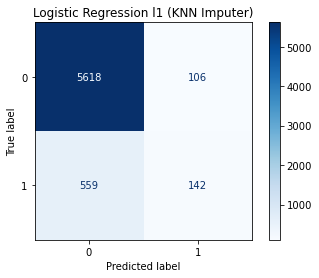

Logistic Regression Model l2 (KNN Imputer) F1 score: 29.86 %


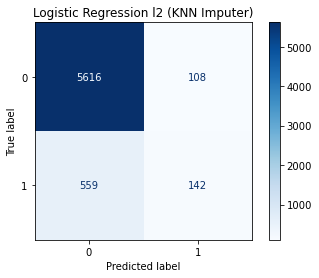

Logistic Regression Model L1 (KNN Imputer) Accuracy: 89.37 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 89.37 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 31.63 %


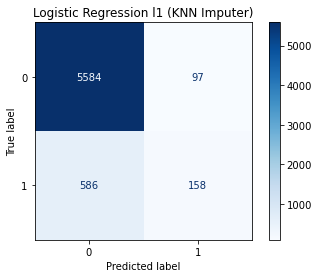

Logistic Regression Model l2 (KNN Imputer) F1 score: 31.63 %


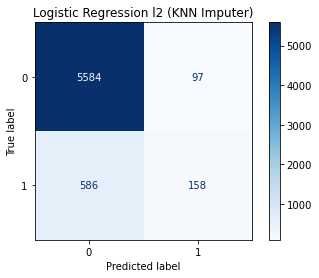

Logistic Regression Model L1 (KNN Imputer) Accuracy: 89.82 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 89.82 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 31.59 %


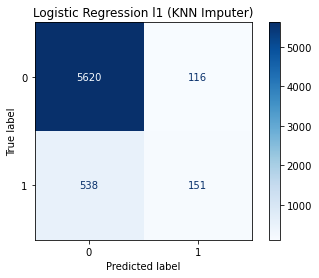

Logistic Regression Model l2 (KNN Imputer) F1 score: 31.59 %


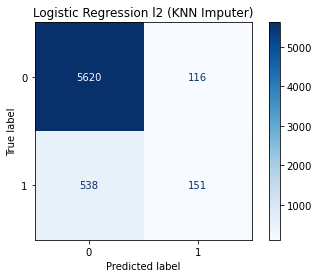

Logistic Regression Model L1 (KNN Imputer) Accuracy: 89.59 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 89.59 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 31.8 %


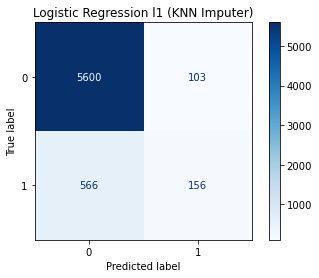

Logistic Regression Model l2 (KNN Imputer) F1 score: 31.8 %


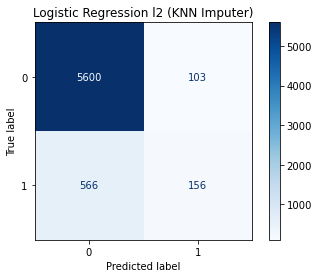

Logistic Regression Model L1 (KNN Imputer) Accuracy: 89.4 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 89.4 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 33.04 %


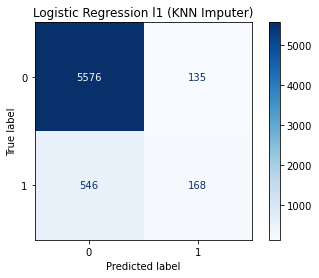

Logistic Regression Model l2 (KNN Imputer) F1 score: 33.04 %


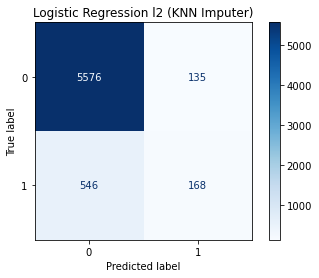

Logistic Regression Model L1 (KNN Imputer) Accuracy: 89.9 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 89.91 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 33.57 %


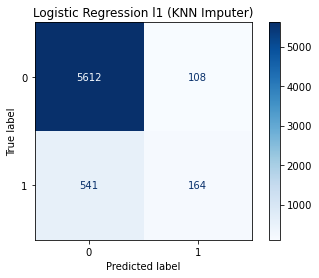

Logistic Regression Model l2 (KNN Imputer) F1 score: 33.74 %


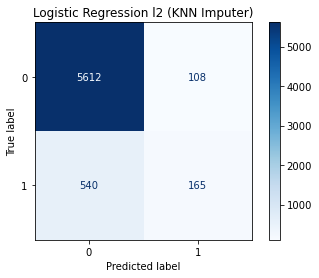

Logistic Regression Model L1 (KNN Imputer) Accuracy: 89.84 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 89.84 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 31.48 %


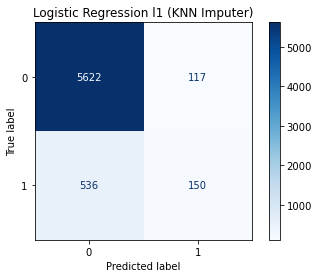

Logistic Regression Model l2 (KNN Imputer) F1 score: 31.48 %


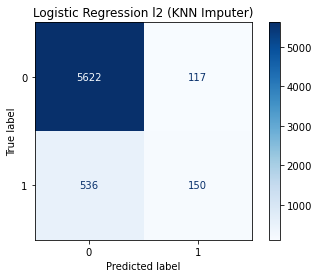

Logistic Regression Model L1 (KNN Imputer) Accuracy: 89.43 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 89.43 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 30.93 %


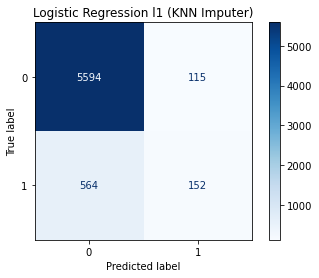

Logistic Regression Model l2 (KNN Imputer) F1 score: 30.93 %


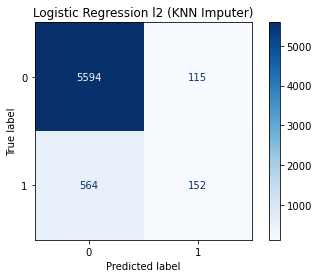

Logistic Regression Model L1 (KNN Imputer) Accuracy: 90.09 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 90.09 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 35.33 %


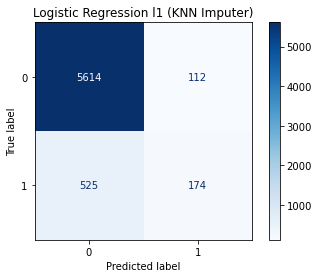

Logistic Regression Model l2 (KNN Imputer) F1 score: 35.33 %


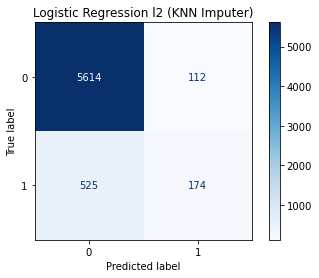

Logistic Regression Model L1 (KNN Imputer) Accuracy: 89.71 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 89.71 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 29.61 %


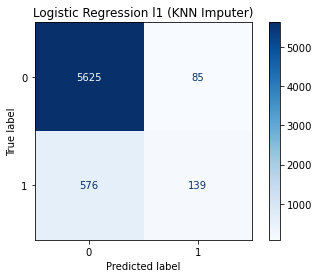

Logistic Regression Model l2 (KNN Imputer) F1 score: 29.61 %


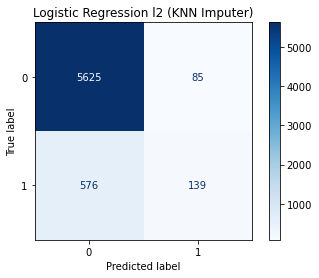

In [312]:
accuracy_list_l1, fscore_list_l1, accuracy_list_l2, fscore_list_l2 = cross_validation(X_scaled, y, t=70)

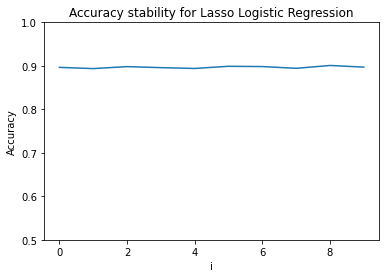

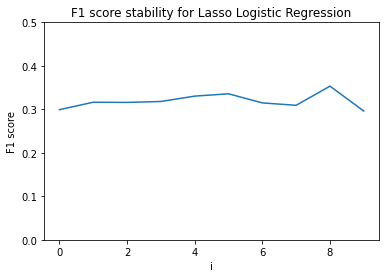

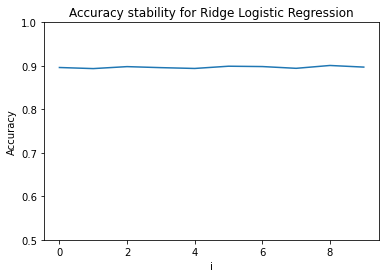

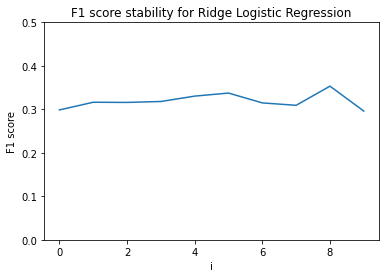

In [313]:
import matplotlib.pyplot as plt
import numpy as np

# Example array (you can replace this with your own array)
acc_array_l1 = np.array(accuracy_list_l1)
f1_array_l1 = np.array(fscore_list_l1)
acc_array_l2 = np.array(accuracy_list_l2)
f1_array_l2 = np.array(fscore_list_l2)

# Plot the array as a line plot
plt.plot(acc_array_l1)

# Add labels and title for the plot
plt.title("Accuracy stability for Lasso Logistic Regression")
plt.xlabel("i")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)

# Show the plot
plt.show()

# Plot the array as a line plot
plt.plot(f1_array_l1)

# Add labels and title for the plot
plt.title("F1 score stability for Lasso Logistic Regression")
plt.xlabel("i")
plt.ylabel("F1 score")
plt.ylim(0, 0.5)
# Show the plot
plt.show()

# Plot the array as a line plot
plt.plot(acc_array_l2)

# Add labels and title for the plot
plt.title("Accuracy stability for Ridge Logistic Regression")
plt.xlabel("i")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)

# Show the plot
plt.show()

# Plot the array as a line plot
plt.plot(f1_array_l2)

# Add labels and title for the plot
plt.title("F1 score stability for Ridge Logistic Regression")
plt.xlabel("i")
plt.ylabel("F1 score")
plt.ylim(0, 0.5)
# Show the plot
plt.show()

In [314]:
print("Average L1 accuracy: ", sum(accuracy_list_l1)/10)
print("Average L1 F1 score: ", sum(fscore_list_l1)/10)

print("Average L2 accuracy: ", sum(accuracy_list_l2)/10)
print("Average L2 F1 score: ", sum(fscore_list_l2)/10)

Average L1 accuracy:  0.8967937743190662
Average L1 F1 score:  0.3189038059047714
Average L2 accuracy:  0.8967782101167314
Average L2 F1 score:  0.3190110411628241


L1 (Lasso) Regularization Model Performance:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      5721
         1.0       0.60      0.23      0.34       704

    accuracy                           0.90      6425
   macro avg       0.75      0.61      0.64      6425
weighted avg       0.88      0.90      0.88      6425

Confusion Matrix for L1 (Lasso):
 [[5610  111]
 [ 540  164]]

L2 (Ridge) Regularization Model Performance:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      5721
         1.0       0.60      0.23      0.33       704

    accuracy                           0.90      6425
   macro avg       0.76      0.61      0.64      6425
weighted avg       0.88      0.90      0.88      6425

Confusion Matrix for L2 (Ridge):
 [[5613  108]
 [ 542  162]]

L1 (Lasso) Regularization Coefficients:
AGE_P: 0.026790176838134373
SEX: 0.3240829662654482
BMI: 0.03190437642187798
HYPEV: 1.175070

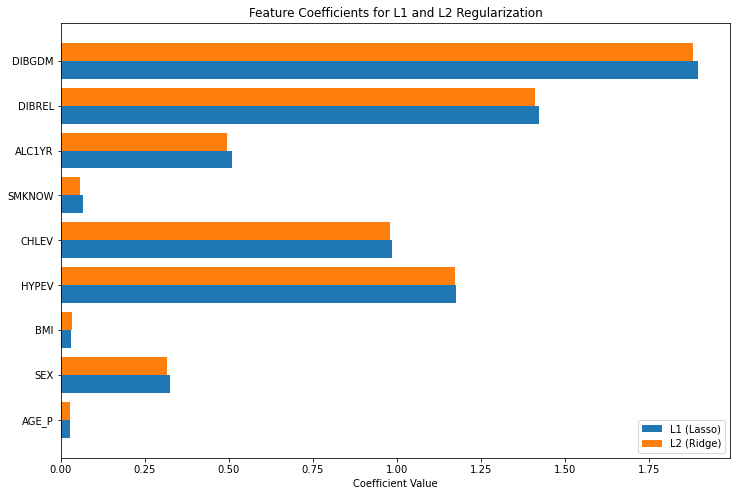

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_new is your updated feature set after removing some features
# y is the target variable (DIBEV1)
X = samadult_imputed.drop('DIBEV1', axis=1)
y = samadult_imputed['DIBEV1']

# Step 1: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# Step 2: Train Logistic Regression with L1 (Lasso) regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_l1.fit(X_train, y_train)

# Step 3: Train Logistic Regression with L2 (Ridge) regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model_l2.fit(X_train, y_train)

# Step 4: Evaluate L1 model
y_pred_l1 = model_l1.predict(X_test)
print("L1 (Lasso) Regularization Model Performance:")
print(classification_report(y_test, y_pred_l1))
print("Confusion Matrix for L1 (Lasso):\n", confusion_matrix(y_test, y_pred_l1))

# Step 5: Evaluate L2 model
y_pred_l2 = model_l2.predict(X_test)
print("\nL2 (Ridge) Regularization Model Performance:")
print(classification_report(y_test, y_pred_l2))
print("Confusion Matrix for L2 (Ridge):\n", confusion_matrix(y_test, y_pred_l2))

# Step 6: Coefficients from L1 (Lasso)
print("\nL1 (Lasso) Regularization Coefficients:")
for name, coef in zip(X.columns, model_l1.coef_[0]):
    print(f"{name}: {coef}")

# Step 7: Coefficients from L2 (Ridge)
print("\nL2 (Ridge) Regularization Coefficients:")
for name, coef in zip(X.columns, model_l2.coef_[0]):
    print(f"{name}: {coef}")

# Step 8: Plotting the coefficients for L1 and L2 regularization
# Coefficients for L1 and L2
coef_l1 = model_l1.coef_[0]
coef_l2 = model_l2.coef_[0]

# Plot the coefficients
fig, ax = plt.subplots(figsize=(12, 8))
x_labels = X.columns  # Use the columns from the updated feature set

ax.barh(np.arange(len(coef_l1)), coef_l1, height=0.4, label='L1 (Lasso)', align='center')
ax.barh(np.arange(len(coef_l2)) + 0.4, coef_l2, height=0.4, label='L2 (Ridge)', align='center')
ax.set_yticks(np.arange(len(x_labels)) + 0.2)
ax.set_yticklabels(x_labels)
ax.set_xlabel("Coefficient Value")
ax.set_title("Feature Coefficients for L1 and L2 Regularization")
ax.legend()

plt.show()

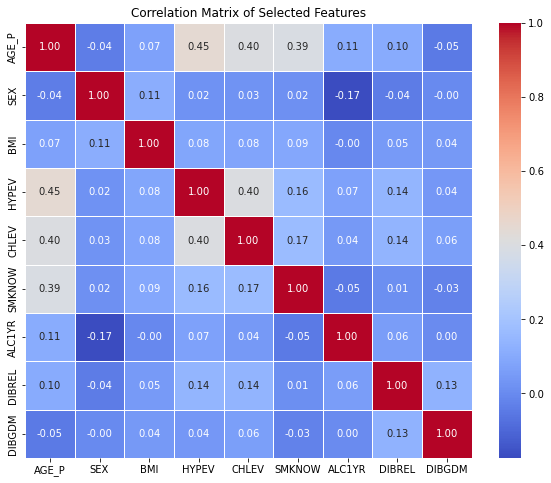

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Calculate the correlation matrix
column_names = X.columns
temp = pd.DataFrame(X_scaled)
temp.columns = column_names
corr_matrix = temp.corr()

# Step 3: Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

## Dealing with imbalanced dataset -- SMOTE

In [42]:
from collections import Counter
from imblearn.over_sampling import SMOTE
# Plot the confusion matrix
def cm_plot(y_test, y_pred, reg='l1'):
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f"Logistic Regression Model {reg} (KNN Imputer) F1 score: {round(f1*100, 2)} %")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plotting the confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Logistic Regression {reg} (KNN Imputer)")
    plt.show()
    return f1

def cross_validation(x, y, t=10):
    accuracy_list_l1, fscore_list_l1 = [], []
    accuracy_list_l2, fscore_list_l2 = [], []
    for i in range(t, t+10):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
        sm = SMOTE(random_state=42)
        X_train, y_train = sm.fit_resample(X_train, y_train)
        # Create a Logistic Regression model
        # Step 2: Train Logistic Regression with L1 (Lasso) regularization
        model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)
        model_l1.fit(X_train, y_train)
        
        # Step 3: Train Logistic Regression with L2 (Ridge) regularization
        model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000)
        model_l2.fit(X_train, y_train)
        
        
        accuracy_l1 = model_l1.score(X_test, y_test)
        accuracy_l2 = model_l2.score(X_test, y_test)
        accuracy_list_l1.append(accuracy_l1)
        accuracy_list_l2.append(accuracy_l2)
        print(f"Logistic Regression Model L1 (KNN Imputer) Accuracy: {round(accuracy_l1*100, 2)} %")
        print(f"Logistic Regression Model L2 (KNN Imputer) Accuracy: {round(accuracy_l2*100, 2)} %")
        y_pred_l1 = model_l1.predict(X_test)
        y_pred_l2 = model_l2.predict(X_test)
        
        f1_l1 = cm_plot(y_test, y_pred_l1, reg='l1')
        f1_l2 = cm_plot(y_test, y_pred_l2, reg='l2')
        fscore_list_l1.append(f1_l1)
        fscore_list_l2.append(f1_l2)
    return accuracy_list_l1, fscore_list_l1, accuracy_list_l2, fscore_list_l2

Logistic Regression Model L1 (KNN Imputer) Accuracy: 76.96 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 76.96 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 43.55 %


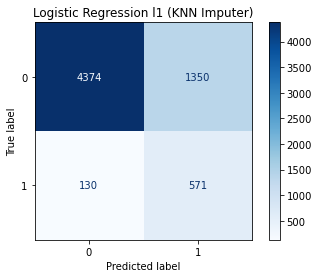

Logistic Regression Model l2 (KNN Imputer) F1 score: 43.55 %


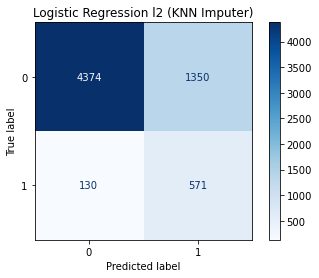

Logistic Regression Model L1 (KNN Imputer) Accuracy: 77.26 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 77.26 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 45.46 %


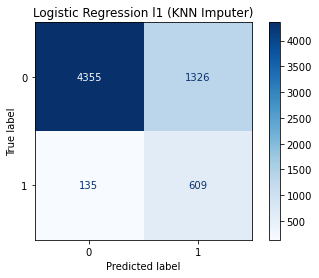

Logistic Regression Model l2 (KNN Imputer) F1 score: 45.46 %


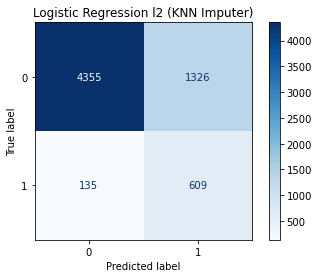

Logistic Regression Model L1 (KNN Imputer) Accuracy: 77.0 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 77.07 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 42.53 %


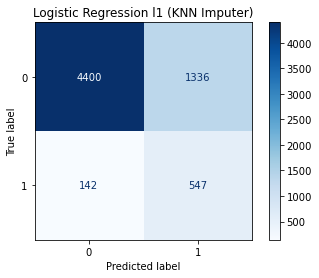

Logistic Regression Model l2 (KNN Imputer) F1 score: 42.62 %


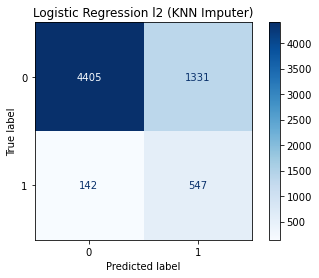

Logistic Regression Model L1 (KNN Imputer) Accuracy: 77.17 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 77.17 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 44.7 %


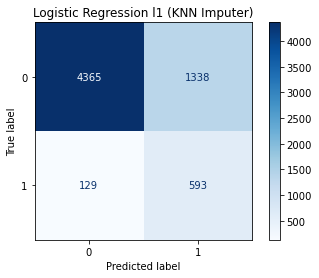

Logistic Regression Model l2 (KNN Imputer) F1 score: 44.7 %


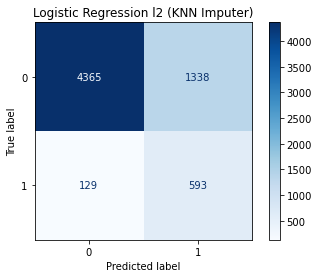

Logistic Regression Model L1 (KNN Imputer) Accuracy: 75.91 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 75.91 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 42.24 %


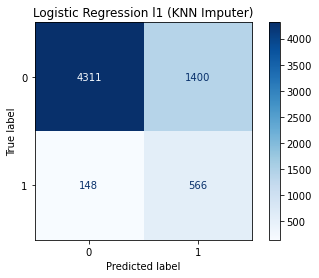

Logistic Regression Model l2 (KNN Imputer) F1 score: 42.24 %


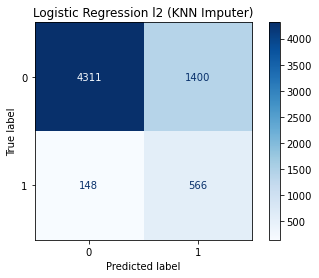

Logistic Regression Model L1 (KNN Imputer) Accuracy: 76.73 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 76.73 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 42.21 %


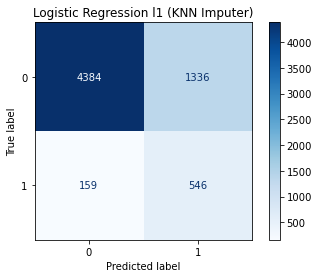

Logistic Regression Model l2 (KNN Imputer) F1 score: 42.21 %


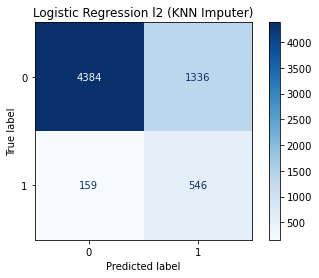

Logistic Regression Model L1 (KNN Imputer) Accuracy: 75.63 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 75.63 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 41.22 %


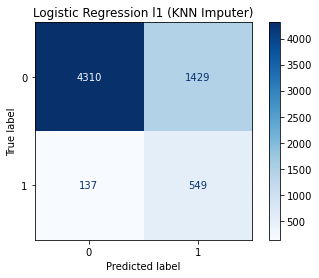

Logistic Regression Model l2 (KNN Imputer) F1 score: 41.22 %


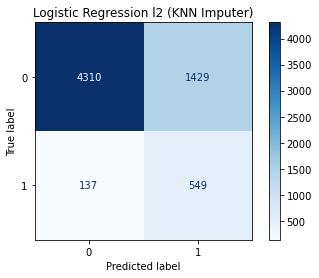

Logistic Regression Model L1 (KNN Imputer) Accuracy: 76.28 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 76.28 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 42.88 %


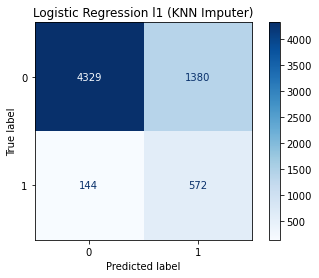

Logistic Regression Model l2 (KNN Imputer) F1 score: 42.88 %


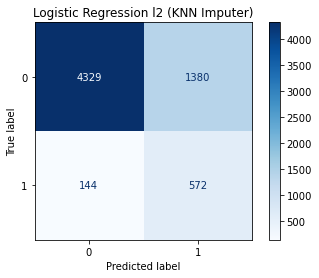

Logistic Regression Model L1 (KNN Imputer) Accuracy: 75.92 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 75.94 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 41.99 %


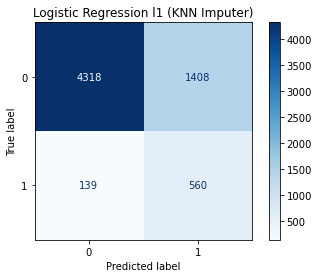

Logistic Regression Model l2 (KNN Imputer) F1 score: 42.01 %


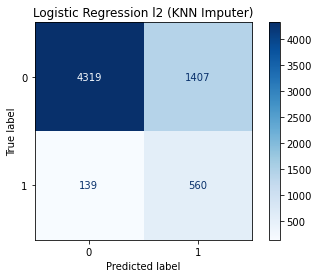

Logistic Regression Model L1 (KNN Imputer) Accuracy: 76.7 %
Logistic Regression Model L2 (KNN Imputer) Accuracy: 76.7 %
Logistic Regression Model l1 (KNN Imputer) F1 score: 43.01 %


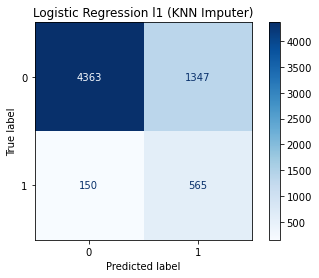

Logistic Regression Model l2 (KNN Imputer) F1 score: 43.01 %


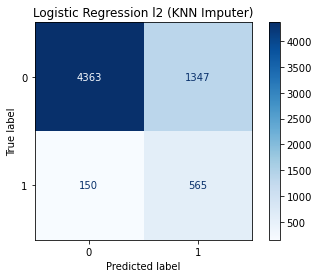

In [43]:
accuracy_list_l1, fscore_list_l1, accuracy_list_l2, fscore_list_l2 = cross_validation(X_scaled, y, t=70)

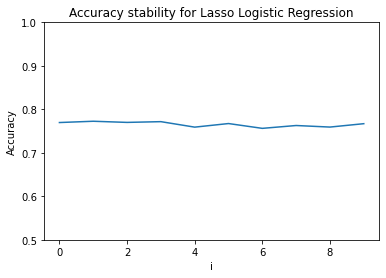

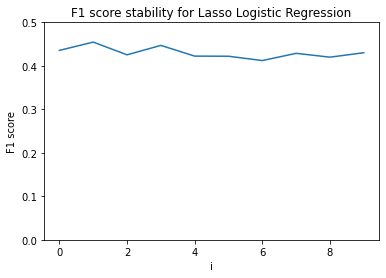

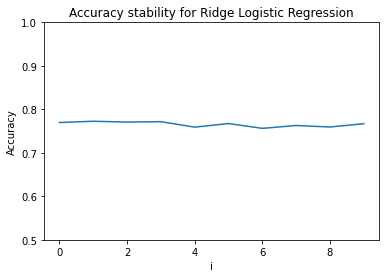

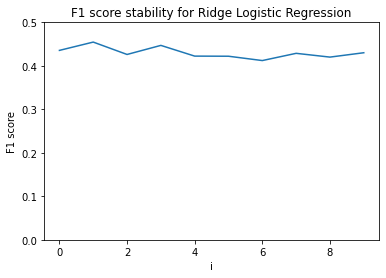

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Example array (you can replace this with your own array)
acc_array_l1 = np.array(accuracy_list_l1)
f1_array_l1 = np.array(fscore_list_l1)
acc_array_l2 = np.array(accuracy_list_l2)
f1_array_l2 = np.array(fscore_list_l2)

# Plot the array as a line plot
plt.plot(acc_array_l1)

# Add labels and title for the plot
plt.title("Accuracy stability for Lasso Logistic Regression")
plt.xlabel("i")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)

# Show the plot
plt.show()

# Plot the array as a line plot
plt.plot(f1_array_l1)

# Add labels and title for the plot
plt.title("F1 score stability for Lasso Logistic Regression")
plt.xlabel("i")
plt.ylabel("F1 score")
plt.ylim(0, 0.5)
# Show the plot
plt.show()

# Plot the array as a line plot
plt.plot(acc_array_l2)

# Add labels and title for the plot
plt.title("Accuracy stability for Ridge Logistic Regression")
plt.xlabel("i")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)

# Show the plot
plt.show()

# Plot the array as a line plot
plt.plot(f1_array_l2)

# Add labels and title for the plot
plt.title("F1 score stability for Ridge Logistic Regression")
plt.xlabel("i")
plt.ylabel("F1 score")
plt.ylim(0, 0.5)
# Show the plot
plt.show()

In [45]:
print("Average L1 accuracy: ", sum(accuracy_list_l1)/10)
print("Average L1 F1 score: ", sum(fscore_list_l1)/10)

print("Average L2 accuracy: ", sum(accuracy_list_l2)/10)
print("Average L2 F1 score: ", sum(fscore_list_l2)/10)

Average L1 accuracy:  0.765556420233463
Average L1 F1 score:  0.42981259961471485
Average L2 accuracy:  0.765649805447471
Average L2 F1 score:  0.4299112011989754


L1 (Lasso) Regularization Model Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.77      0.86      5721
         1.0       0.30      0.79      0.43       704

    accuracy                           0.77      6425
   macro avg       0.63      0.78      0.65      6425
weighted avg       0.89      0.77      0.81      6425

Confusion Matrix for L1 (Lasso):
 [[4416 1305]
 [ 146  558]]

L2 (Ridge) Regularization Model Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.77      0.86      5721
         1.0       0.30      0.79      0.43       704

    accuracy                           0.77      6425
   macro avg       0.63      0.78      0.65      6425
weighted avg       0.89      0.77      0.81      6425

Confusion Matrix for L2 (Ridge):
 [[4416 1305]
 [ 146  558]]

L1 (Lasso) Regularization Coefficients:
AGE_P: 0.030127946700956417
SEX: 0.2326231370215101
BMI: 0.03166509383673705
HYPEV: 1.349346

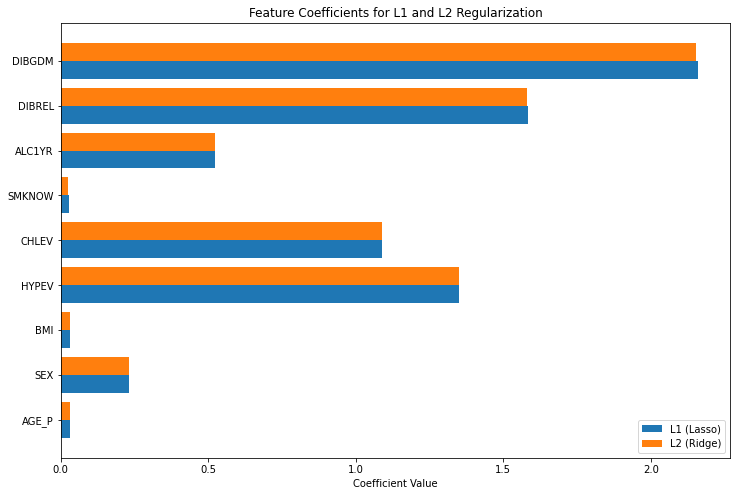

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_new is your updated feature set after removing some features
# y is the target variable (DIBEV1)
X = samadult_imputed.drop('DIBEV1', axis=1)
y = samadult_imputed['DIBEV1']

# Step 1: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Step 2: Train Logistic Regression with L1 (Lasso) regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_l1.fit(X_train, y_train)

# Step 3: Train Logistic Regression with L2 (Ridge) regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model_l2.fit(X_train, y_train)

# Step 4: Evaluate L1 model
y_pred_l1 = model_l1.predict(X_test)
print("L1 (Lasso) Regularization Model Performance:")
print(classification_report(y_test, y_pred_l1))
print("Confusion Matrix for L1 (Lasso):\n", confusion_matrix(y_test, y_pred_l1))

# Step 5: Evaluate L2 model
y_pred_l2 = model_l2.predict(X_test)
print("\nL2 (Ridge) Regularization Model Performance:")
print(classification_report(y_test, y_pred_l2))
print("Confusion Matrix for L2 (Ridge):\n", confusion_matrix(y_test, y_pred_l2))

# Step 6: Coefficients from L1 (Lasso)
print("\nL1 (Lasso) Regularization Coefficients:")
for name, coef in zip(X.columns, model_l1.coef_[0]):
    print(f"{name}: {coef}")

# Step 7: Coefficients from L2 (Ridge)
print("\nL2 (Ridge) Regularization Coefficients:")
for name, coef in zip(X.columns, model_l2.coef_[0]):
    print(f"{name}: {coef}")

# Step 8: Plotting the coefficients for L1 and L2 regularization
# Coefficients for L1 and L2
coef_l1 = model_l1.coef_[0]
coef_l2 = model_l2.coef_[0]

# Plot the coefficients
fig, ax = plt.subplots(figsize=(12, 8))
x_labels = X.columns  # Use the columns from the updated feature set

ax.barh(np.arange(len(coef_l1)), coef_l1, height=0.4, label='L1 (Lasso)', align='center')
ax.barh(np.arange(len(coef_l2)) + 0.4, coef_l2, height=0.4, label='L2 (Ridge)', align='center')
ax.set_yticks(np.arange(len(x_labels)) + 0.2)
ax.set_yticklabels(x_labels)
ax.set_xlabel("Coefficient Value")
ax.set_title("Feature Coefficients for L1 and L2 Regularization")
ax.legend()

plt.show()

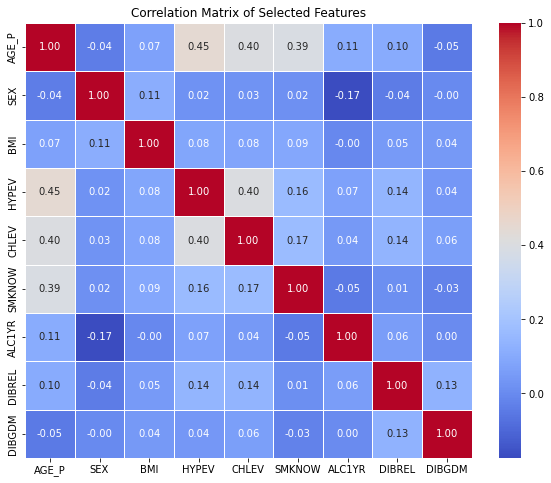

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Calculate the correlation matrix
column_names = X.columns
temp = pd.DataFrame(X_scaled)
temp.columns = column_names
corr_matrix = temp.corr()

# Step 3: Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

## Preprocess Nan -- make it a new category

Preprocessing from previous steps -- excluding filling 7 with mode

In [171]:
df = pd.read_csv("samadult.csv")
samadult = df[columns_to_keep]
samadult['BMI']=samadult['BMI']/100
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'

samadult['BMI'] = samadult['BMI'].apply(categorize_bmi)
categorical_columns = ['SEX', 'HYPEV', 'CHLEV', 'SMKNOW', 'DIBREL', 'DIBGDM', 'ALC1YR']
samadult[categorical_columns] = samadult[categorical_columns].replace([9], np.nan)
samadult = samadult[samadult["DIBEV1"].isin({1, 2})]
samadult.loc[samadult["DIBEV1"] == 2, "DIBEV1"] = 0
samadult.loc[samadult["SEX"]==2, "SEX"] = 0
label_encoder = LabelEncoder()
samadult['BMI'] = label_encoder.fit_transform(samadult['BMI']) 

/var/folders/nl/hvb2wh_x56xfglf7ds9c47tc0000gn/T/ipykernel_84198/2597863787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samadult['BMI']=samadult['BMI']/100
/var/folders/nl/hvb2wh_x56xfglf7ds9c47tc0000gn/T/ipykernel_84198/2597863787.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samadult['BMI'] = samadult['BMI'].apply(categorize_bmi)


##### Take a look at the original feature distributions

In [172]:
for c in columns_to_keep:
    print(samadult[c].value_counts(dropna=False))

85    1108
68     610
63     599
59     595
60     591
      ... 
80     245
81     227
82     206
83     186
84     176
Name: AGE_P, Length: 68, dtype: int64
0.0    17541
1.0    14565
Name: SEX, dtype: int64
2    10852
0    10400
1    10295
3      559
Name: BMI, dtype: int64
2.0    20958
1.0    11111
NaN       26
7.0       11
Name: HYPEV, dtype: int64
2.0    22554
1.0     9480
NaN       61
7.0       11
Name: CHLEV, dtype: int64
NaN    19052
3.0     7853
1.0     3998
2.0     1197
7.0        3
8.0        3
Name: SMKNOW, dtype: int64
1.0    20979
2.0    10909
8.0      153
7.0       45
NaN       20
Name: ALC1YR, dtype: int64
2.0    20526
1.0    11146
NaN      420
7.0       14
Name: DIBREL, dtype: int64
NaN    18865
2.0    12341
1.0      898
7.0        2
Name: DIBGDM, dtype: int64
0    28587
1     3519
Name: DIBEV1, dtype: int64


As we observe, data points of 7 (refuse to answer) has extremely low proportion, therefore we fill 7 with Nan as well. Also, there are unexplainable value 8 in some columns, we also fill it with nan value. In the end, we fill nan with value 0.

In [173]:
# fill nan for 8 and 7
samadult[categorical_columns] = samadult[categorical_columns].replace([7], np.nan)
samadult[categorical_columns] = samadult[categorical_columns].replace([8], np.nan)
samadult = samadult.fillna(value=0)

In [174]:
# Increase readability for smoking
def smk_func(x):
    if x == 3:
        return 0
    elif x == 1:
        return 2
    elif x == 2:
        return 1
    elif x == 0:
        return 0
samadult['SMKNOW'] = samadult['SMKNOW'].apply(smk_func)

In [175]:
samadult.loc[samadult['DIBGDM']==2, 'DIBGDM'] = 0
samadult.loc[(samadult['SEX']==1) & (samadult['DIBGDM']==1), 'DIBGDM'] = 0

In [176]:
for c in ["HYPEV", "CHLEV", "SMKNOW", "ALC1YR", "DIBREL", "DIBGDM"]:
    samadult[c] = samadult[c].astype(str)

In [180]:
onehot_df.head()

,AGE_P,SEX,BMI,HYPEV_0.0,HYPEV_1.0,HYPEV_2.0,CHLEV_0.0,CHLEV_1.0,CHLEV_2.0,SMKNOW_0,SMKNOW_1,SMKNOW_2,ALC1YR_0.0,ALC1YR_1.0,ALC1YR_2.0,DIBREL_0.0,DIBREL_1.0,DIBREL_2.0,DIBGDM_0.0,DIBGDM_1.0
0,-1.532003,1.0,-0.057266,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0
1,-1.424608,0.0,-1.228331,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0
2,1.367662,1.0,1.113799,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0
3,-0.780238,0.0,-0.057266,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0
4,-0.833935,0.0,-0.057266,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0


In [182]:
X = samadult.drop('DIBEV1', axis=1)
y = samadult['DIBEV1']

onehot_df = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
columns_to_scale = ["AGE_P", "BMI"]
onehot_df[columns_to_scale] = scaler.fit_transform(onehot_df[columns_to_scale])

# Split the dataset into training and testing sets (80% train, 20% test)
def cross_validation(x, y, t=10):
    accuracy_list, fscore_list = [], []
    for i in range(t, t+10):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
        
        # Create a Logistic Regression model
        model = LogisticRegression()
        
        # Train the model
        model.fit(X_train, y_train)
        
        accuracy = model.score(X_test, y_test)
        accuracy_list.append(accuracy)
        print(f"Logistic Regression Model (KNN Imputer) Accuracy: {round(accuracy*100, 2)} %")
        y_pred = model.predict(X_test)
        
        # Plot the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        TN, FP, FN, TP = cm.ravel()
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * (precision * recall) / (precision + recall)
        fscore_list.append(f1)
        print(f"Logistic Regression Model (KNN Imputer) F1 score: {round(f1*100, 2)} %")
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        
        # Plotting the confusion matrix
        disp.plot(cmap=plt.cm.Blues)
        plt.title("Nan as category")
        plt.show()
    return accuracy_list, fscore_list

Logistic Regression Model (Nan as category) Accuracy: 88.93 %
Logistic Regression Model (Nan as category) F1 score: 28.97 %


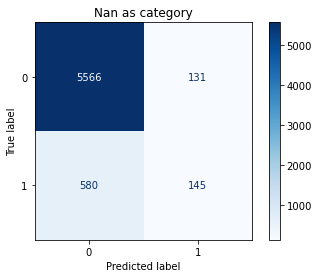

Logistic Regression Model (Nan as category) Accuracy: 89.05 %
Logistic Regression Model (Nan as category) F1 score: 28.48 %


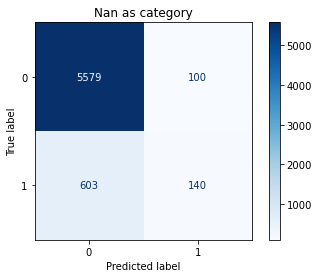

Logistic Regression Model (Nan as category) Accuracy: 89.04 %
Logistic Regression Model (Nan as category) F1 score: 30.98 %


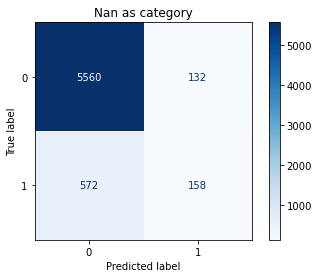

Logistic Regression Model (Nan as category) Accuracy: 89.36 %
Logistic Regression Model (Nan as category) F1 score: 26.64 %


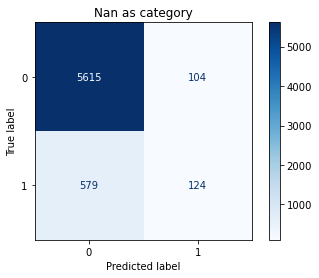

Logistic Regression Model (Nan as category) Accuracy: 89.35 %
Logistic Regression Model (Nan as category) F1 score: 30.91 %


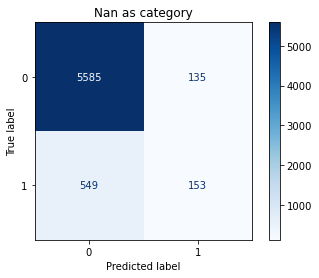

Logistic Regression Model (Nan as category) Accuracy: 89.77 %
Logistic Regression Model (Nan as category) F1 score: 28.97 %


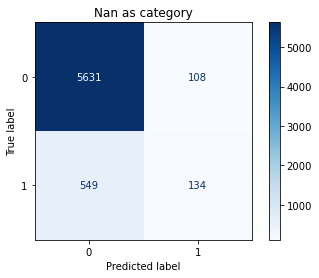

Logistic Regression Model (Nan as category) Accuracy: 88.6 %
Logistic Regression Model (Nan as category) F1 score: 24.54 %


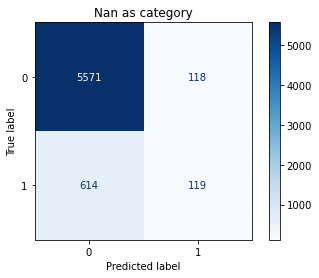

Logistic Regression Model (Nan as category) Accuracy: 89.57 %
Logistic Regression Model (Nan as category) F1 score: 30.64 %


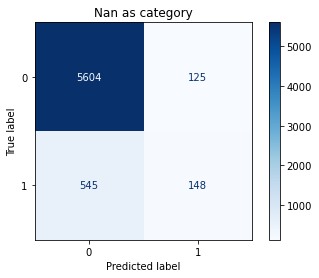

Logistic Regression Model (Nan as category) Accuracy: 89.61 %
Logistic Regression Model (Nan as category) F1 score: 29.86 %


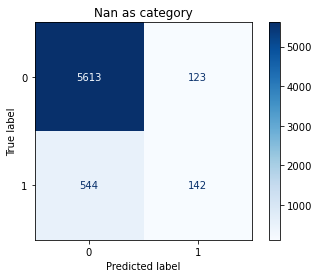

Logistic Regression Model (Nan as category) Accuracy: 89.18 %
Logistic Regression Model (Nan as category) F1 score: 28.72 %


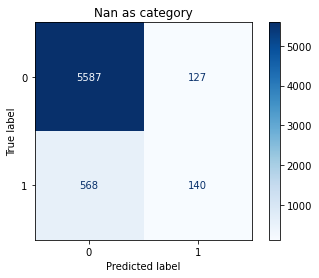

Logistic Regression Model (Nan as category) Accuracy: 89.75 %
Logistic Regression Model (Nan as category) F1 score: 31.03 %


/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


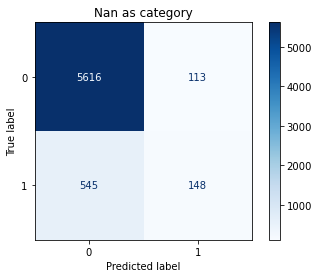

Logistic Regression Model (Nan as category) Accuracy: 89.36 %
Logistic Regression Model (Nan as category) F1 score: 29.08 %


/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


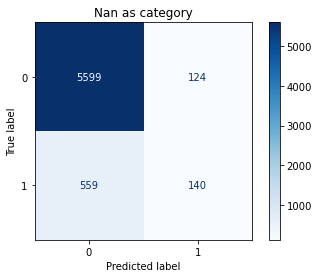

Logistic Regression Model (Nan as category) Accuracy: 89.18 %
Logistic Regression Model (Nan as category) F1 score: 27.98 %


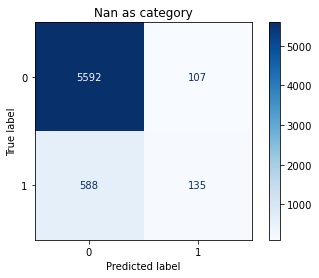

Logistic Regression Model (Nan as category) Accuracy: 89.68 %
Logistic Regression Model (Nan as category) F1 score: 30.43 %


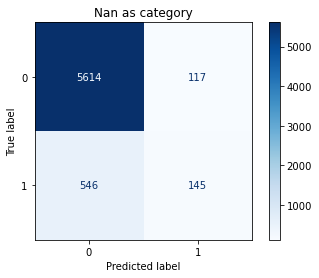

Logistic Regression Model (Nan as category) Accuracy: 89.64 %
Logistic Regression Model (Nan as category) F1 score: 30.94 %


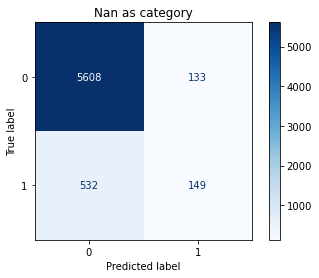

Logistic Regression Model (Nan as category) Accuracy: 89.43 %
Logistic Regression Model (Nan as category) F1 score: 29.49 %


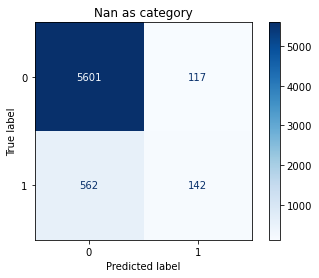

Logistic Regression Model (Nan as category) Accuracy: 89.35 %
Logistic Regression Model (Nan as category) F1 score: 28.3 %


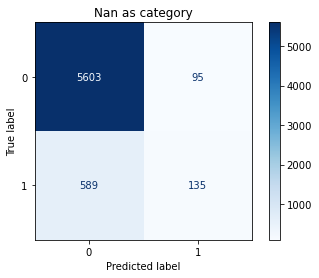

Logistic Regression Model (Nan as category) Accuracy: 89.41 %
Logistic Regression Model (Nan as category) F1 score: 29.17 %


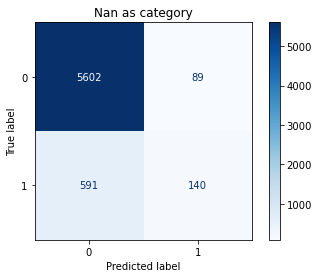

Logistic Regression Model (Nan as category) Accuracy: 89.08 %
Logistic Regression Model (Nan as category) F1 score: 29.83 %


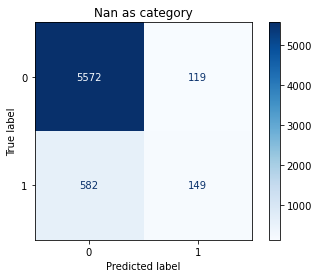

Logistic Regression Model (Nan as category) Accuracy: 89.05 %
Logistic Regression Model (Nan as category) F1 score: 28.48 %


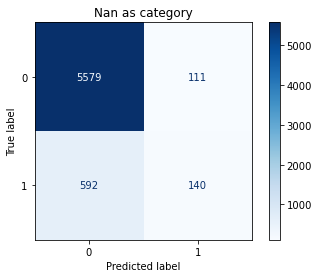

In [183]:
accuracy_list, fscore_list = cross_validation(onehot_df, y, t=10)

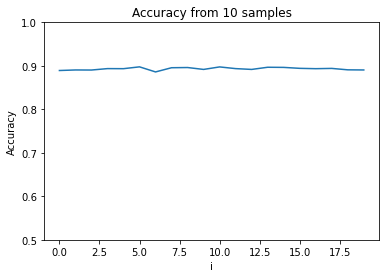

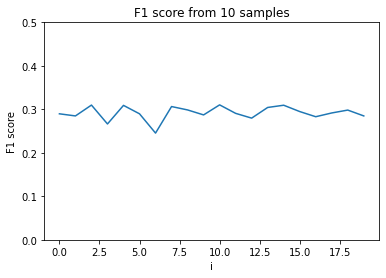

In [187]:
import matplotlib.pyplot as plt
import numpy as np

# Example array (you can replace this with your own array)
acc_array = np.array(accuracy_list)
f1_array = np.array(fscore_list)

# Plot the array as a line plot
plt.plot(acc_array)

# Add labels and title for the plot
plt.title("Accuracy from 10 samples")
plt.xlabel("i")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)

# Show the plot
plt.show()

# Plot the array as a line plot
plt.plot(f1_array)

# Add labels and title for the plot
plt.title("F1 score from 10 samples")
plt.xlabel("i")
plt.ylabel("F1 score")
plt.ylim(0, 0.5)
# Show the plot
plt.show()